In [4]:
from matplotlib import pyplot as plt
import numpy as np
from random import choice
import time
from IPython.display import clear_output
from time import sleep 
import math
import pandas as pd
%matplotlib inline

## Draw initial plot

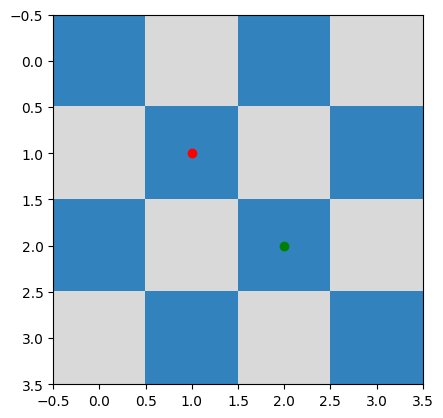

In [10]:
x = range(4)
y = range(4)
h,v = np.meshgrid(x,y)  #rect grid with vector coordinates (X,Y)
#min_max = np.min(x), np.max(x), np.min(y), np.max(y) 
res = np.add.outer(range(4), range(4))%2  # returns product of two vectors
positions=np.vstack([h.ravel(), v.ravel()]).T
start_position = choice(positions)
target_position = choice(positions)
possible_moves = [-1, 0, 1]

def draw_board():
    start_dot = plt.scatter(start_position[0],start_position[1],color="r")
    target_dot = plt.scatter(target_position[0],target_position[1],color="g")
    plt.imshow(res, cmap="tab20c")

if not np.array_equal(start_position,target_position):
    draw_board()


## Explore

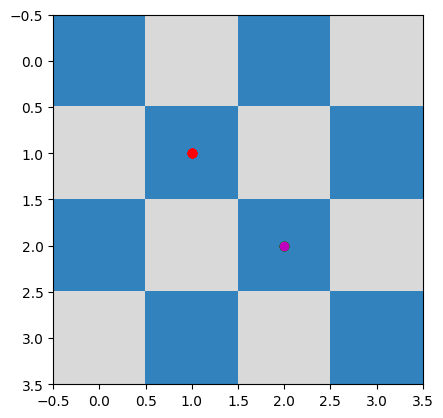

Target reached!
Total Steps: 32
Route: [[1, 1], [0, 1], [1, 1], [0, 1], [0, 0], [1, 0], [0, 0], [0, 1], [0, 2], [1, 2], [0, 2], [0, 1], [0, 2], [1, 2], [1, 3], [2, 3], [3, 3], [3, 2], [3, 3], [3, 2], [3, 3], [2, 3], [3, 3], [2, 3], [2, 2]]


In [19]:
route = []
stepcounter = 0
route.append([start_position[0], start_position[1]])
newposx, newposy = 0, 0

while True:
    clear_output(True)
    movex = choice(possible_moves)
    movey = choice(possible_moves)
    last_pos = route[-1]
    draw_board()
    sleep(0.2)
    if not movex == movey:
        if movex == 0 or movey == 0:
            newposx = last_pos[0] + movex
            newposy = last_pos[1] + movey
            if newposx >= 0 and newposx <= 3 and newposy >= 0 and newposy <= 3:
                # print(f"New pos: {newposx, newposy}")
                route.append([newposx, newposy])
                plt.scatter(newposx, newposy, color="m")
                plt.show()
            if newposx == target_position[0] and newposy == target_position[1]:
                print("Target reached!")
                plt.show()
                break
            stepcounter += 1

print(f"Total Steps: {stepcounter}")
print(f"Route: {route}",sep="\n")


## Build Table

In [21]:
# testlist = [[0, 0], [1, 0], [0, 0], [1, 0], [1, 1], [1, 2], [0, 2], [0, 1], [0, 2], [0, 1], [0, 2], [0, 1], [1, 1], [2, 1], [2, 0]]
ttlist = [
    tuple(x) for x in route
]  # converts list into immutable list like [(1,3),(1,2)]
ttlist = ttlist[::-1]  # reverses the list to go the route backwards
vals = [[ttlist[0], 1]]  # adds target position to list
multipliedrewards_list = dict.fromkeys(ttlist)
ttlist.pop(0)  # deletes target position from ttlist otherwise it would be a duplicate
q = 1
reward = 0.9
# create list with positions + rewarded values
for x in ttlist:
    vals.append([x, math.pow(reward, q)])
    q += 1

# creates table with final reward values
# add value to table if not exist, otherwise multiply with existing value
pd.options.display.float_format = "{:,.5g}".format
df = pd.DataFrame(columns=[0, 1, 2, 3], index=[0, 1, 2, 3])
for x in vals:
    mrl_temp = multipliedrewards_list.get(x[0])
    if not mrl_temp:
        multipliedrewards_list[x[0]] = x[1]
    else:
        multipliedrewards_list[x[0]] = x[1] * mrl_temp
for x in multipliedrewards_list:
    df.at[x[0], x[1]] = multipliedrewards_list.get(x)

df = df.T  # swap axis
df

{(2, 2): 1, (2, 3): 0.25418658283290013, (3, 3): 0.12157665459056934, (3, 2): 0.28242953648100005, (1, 3): 0.3486784401000001, (1, 2): 0.06461081889226676, (0, 2): 0.011972515182562034, (0, 1): 0.00041109831670569746, (0, 0): 0.018248003631400746, (1, 0): 0.13508517176729928, (1, 1): 0.00785516721127895}


,0,1,2,3
0,0.018248,0.13509,NaN,NaN
1,0.0004111,0.0078552,NaN,NaN
2,0.011973,0.064611,1,0.28243
3,NaN,0.34868,0.25419,0.12158


## Exploit

In [ ]:
#TODO
route = []
stepcounter = 0
route.append([start_position[0], start_position[1]])
newposx, newposy = 0, 0

while True:
    clear_output(True)
    movex = choice(possible_moves)
    movey = choice(possible_moves)
    last_pos = route[-1]
    draw_board()
    sleep(0.2)
    if not movex == movey:
        if movex == 0 or movey == 0:
            newposx = last_pos[0] + movex
            newposy = last_pos[1] + movey
            if newposx >= 0 and newposx <= 3 and newposy >= 0 and newposy <= 3:
                # print(f"New pos: {newposx, newposy}")
                route.append([newposx, newposy])
                plt.scatter(newposx, newposy, color="m")
                plt.show()
            if newposx == target_position[0] and newposy == target_position[1]:
                print("Target reached!")
                plt.show()
                break
            stepcounter += 1

print(f"Total Steps: {stepcounter}")
print(f"Route: {route}",sep="\n")